In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
#from scipy import stats

DATA_FILEPATH = "coursework_1_data_2019.csv"
df = pd.read_csv(DATA_FILEPATH)

In [2]:
#Removes City of London as it is an evident outlier in the dataset

df = df.drop(df[df.local_authority_area == "City of London"].index)
df = df.drop(df[df.local_authority_area == "Isles of Scilly"].index)

In [3]:
# Creates two new columns with the percentage of childhood obesity in the total population

df["2008_obesity_percentage_pop"] = (df["2008_cases_total"] / df["2008_pop_total"])*100
df["2018_obesity_percentage_pop"] = (df["2018_cases_total"] / df["2018_pop_total"])*100

## Data exploration

Text(0.5, 0, 'Percentage of childhood obesity in population by Local Authority')

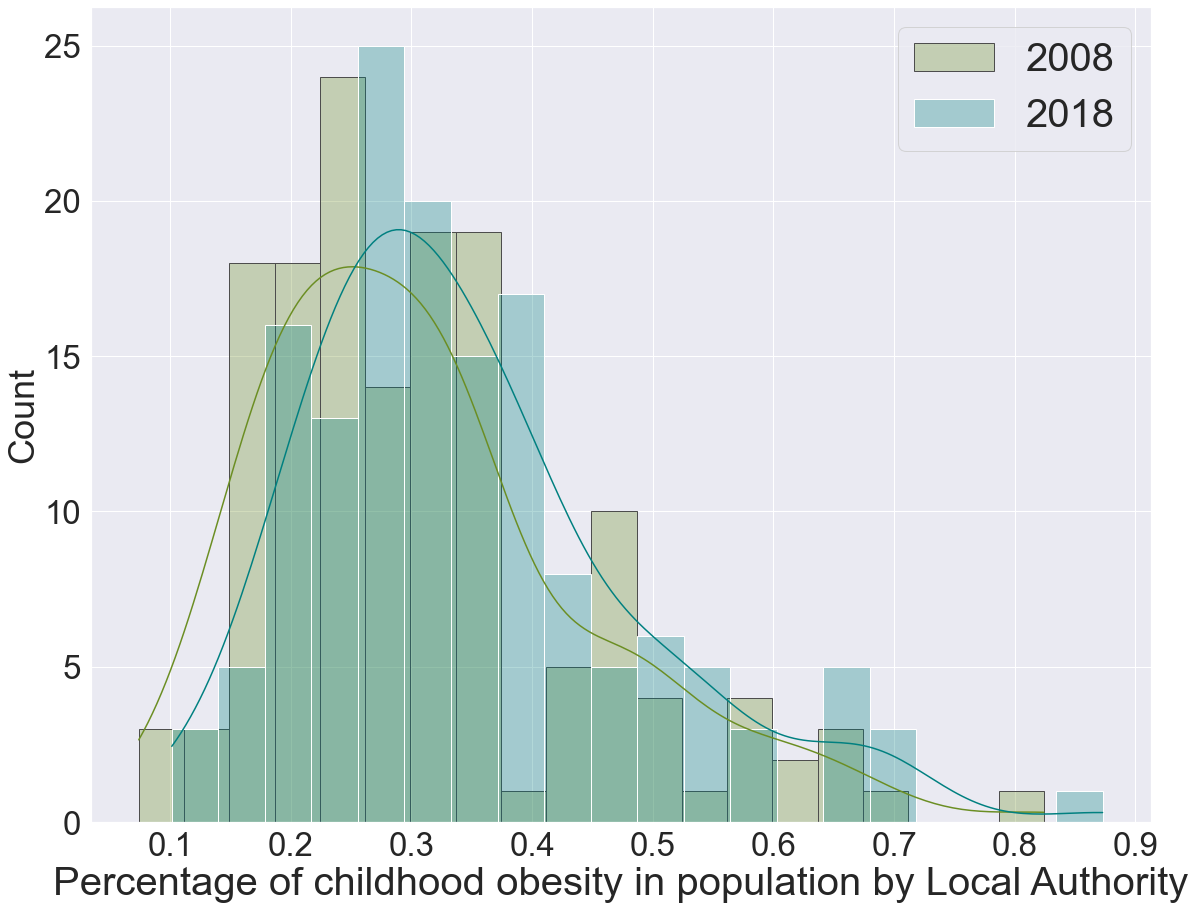

In [4]:
# Creates a histogram with the count of childhood obesity percentage in the total population

plt.figure(figsize=(19,15))
sns.set_theme(style="darkgrid")
sns.set(font_scale=3)
sns.histplot(data=df, x="2008_obesity_percentage_pop", stat="count", bins=20, edgecolor=".3", color="olivedrab", alpha=0.3, label="2008", kde=True, legend=True)
sns.histplot(data=df, x="2018_obesity_percentage_pop", stat="count", bins=20, color="teal", alpha=0.3, label="2018", kde=True, legend=True)
plt.legend(prop={'size':40})

plt.xlabel('Percentage of childhood obesity in population by Local Authority',fontsize=40)

In [5]:
df["2008_obesity_percentage_pop"].describe()

count    150.000000
mean       0.311402
std        0.137101
min        0.074004
25%        0.216962
50%        0.292012
75%        0.366912
max        0.824132
Name: 2008_obesity_percentage_pop, dtype: float64

In [6]:
df["2018_obesity_percentage_pop"].describe()

count    150.000000
mean       0.347189
std        0.137892
min        0.101388
25%        0.256821
50%        0.320777
75%        0.407715
max        0.872881
Name: 2018_obesity_percentage_pop, dtype: float64

## Boxplot

In [7]:
# Transpose 2008 and 2018 obesity percentage population columns to categorical variables for plotting 

df_hue = df[["local_authority_area", "2008_obesity_percentage_pop", "2018_obesity_percentage_pop"]]
df_hue = pd.melt(df_hue, id_vars="local_authority_area", value_vars=["2008_obesity_percentage_pop", "2018_obesity_percentage_pop"])

(array([0, 1]), [])

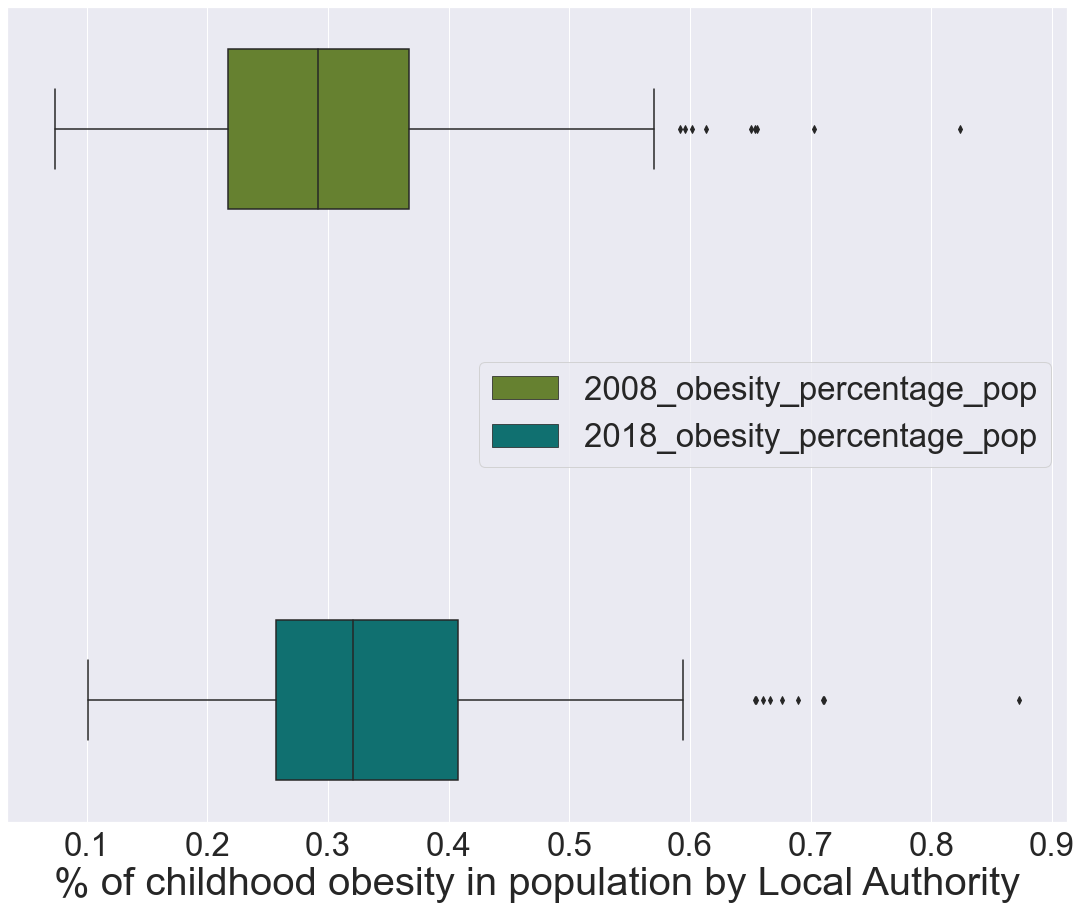

In [9]:
# Creates two supplementary boxplots

plt.figure(figsize=(19,15))
sns.boxplot(data=df_hue, x="value", y="variable", hue="variable", palette=["olivedrab","teal"])
plt.legend( frameon=True, loc="center right")
plt.xlabel('% of childhood obesity in population by Local Authority', size=40)
plt.ylabel('')
plt.tick_params(labelleft=False, left=False)
plt.yticks()

In [10]:
# Calculates the ablsolute and relative changes in childhood obesity percentage for 2008 and 2018

df["absolute_change"] = df["2018_obesity_percentage_pop"]-df["2008_obesity_percentage_pop"]
df["relative_change"] = ((df["2018_obesity_percentage_pop"]-(df["2008_obesity_percentage_pop"]))/df["2008_obesity_percentage_pop"])*100

## Comparison by region

In [11]:
# Creates a DataFrame with the mean values of the initial DataFrame 
# grouped by region and sorted by "2008_obesity_percentage_pop"

df_region = df.groupby("region").mean().sort_values(by="2008_obesity_percentage_pop", ascending=True)

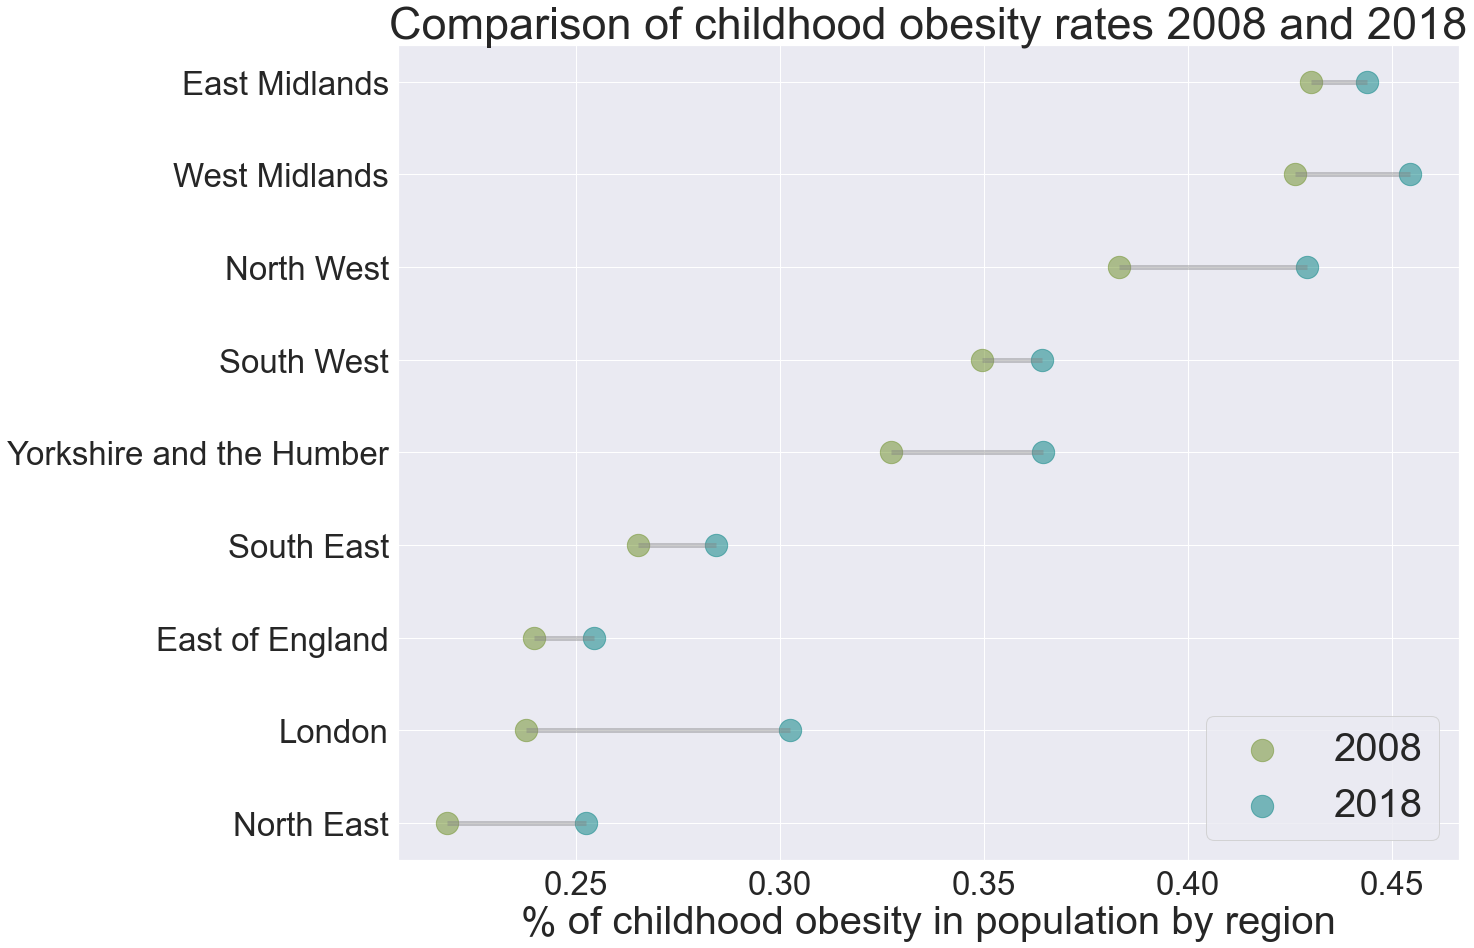

In [13]:
# Creates a lollipop plot comparing the childhood obesity percentage in 2008 and 2018 for regions

my_range=range(1,len(df_region.index)+1)
plt.figure(figsize=(19,15))
plt.hlines(y=my_range, xmin=df_region['2008_obesity_percentage_pop'], xmax=df_region['2018_obesity_percentage_pop'], linewidth=5,color='grey', alpha=0.4)
plt.scatter(df_region['2008_obesity_percentage_pop'], my_range, color='olivedrab', s=500, alpha=0.5, label='2008')
plt.scatter(df_region['2018_obesity_percentage_pop'], my_range, color='teal', s=500, alpha=0.5, label='2018')
plt.yticks(my_range, df_region.index)
plt.title("Comparison of childhood obesity rates 2008 and 2018", loc='center', size=45)
plt.xlabel('% of childhood obesity in population by region', size=40)
plt.legend(prop={'size':40}, loc="lower right")

## New variables for the different budgets per person

In [14]:
# Creates new variables for each budget allocation per person

mean_pop = (df["2008_pop_total"]+df["2018_pop_total"])/2
df["budget_per_person"] = df["total_budget"]/mean_pop
df["clean_air_per_person"] = df["clean_air"]/mean_pop
df["clean_environ_per_person"] = df["clean_environ"]/mean_pop
df["health_training_per_person"] = df["health_training"]/mean_pop
df["school_awareness_per_person"] = df["school_awareness"]/mean_pop
df["media_awareness_per_person"] = df["media_awareness"]/mean_pop
df["sub_counselling_per_person"] = df["sub_counselling"]/mean_pop

## Correlation Matrix

<AxesSubplot:>

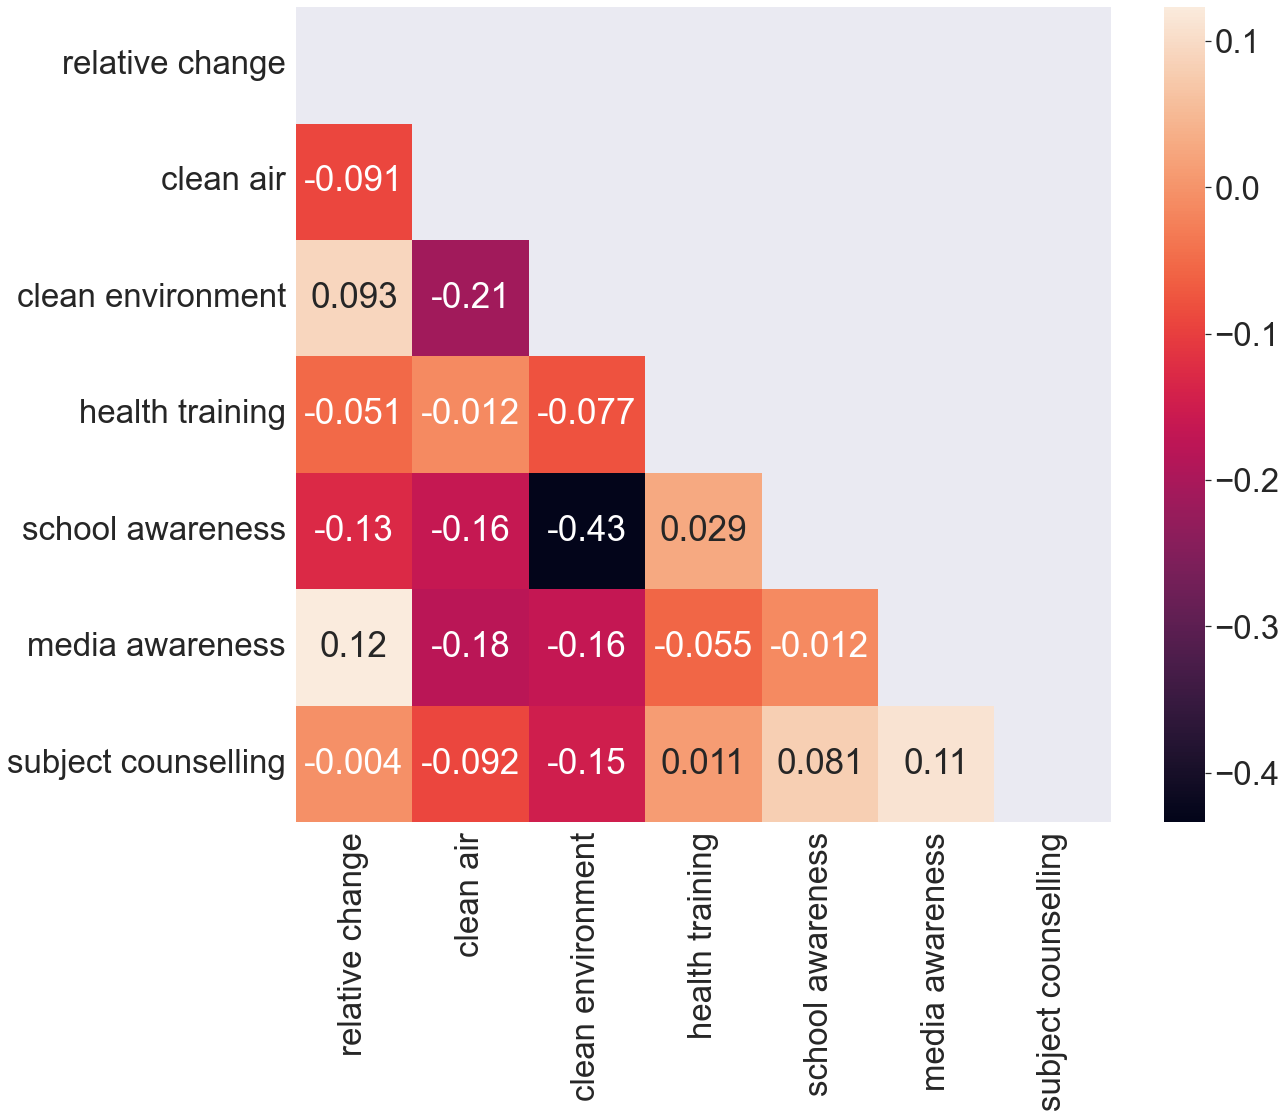

In [16]:
# Correlation Matrix

df_corr = df.loc[:, ["relative_change", 'clean_air_per_person', 'clean_environ_per_person',
       'health_training_per_person', 'school_awareness_per_person', 'media_awareness_per_person',
       'sub_counselling_per_person']]

plt.figure(figsize=(19,15))
mask = np.zeros_like(df_corr.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr.corr(), annot=True, annot_kws={"size": 35}, mask=mask,square=True, 
           xticklabels=["relative change", "clean air", "clean environment", "health training", 
                         "school awareness", "media awareness", "subject counselling"], 
            yticklabels=["relative change", "clean air", "clean environment", "health training", 
                         "school awareness", "media awareness", "subject counselling"])

## Scatter Plot

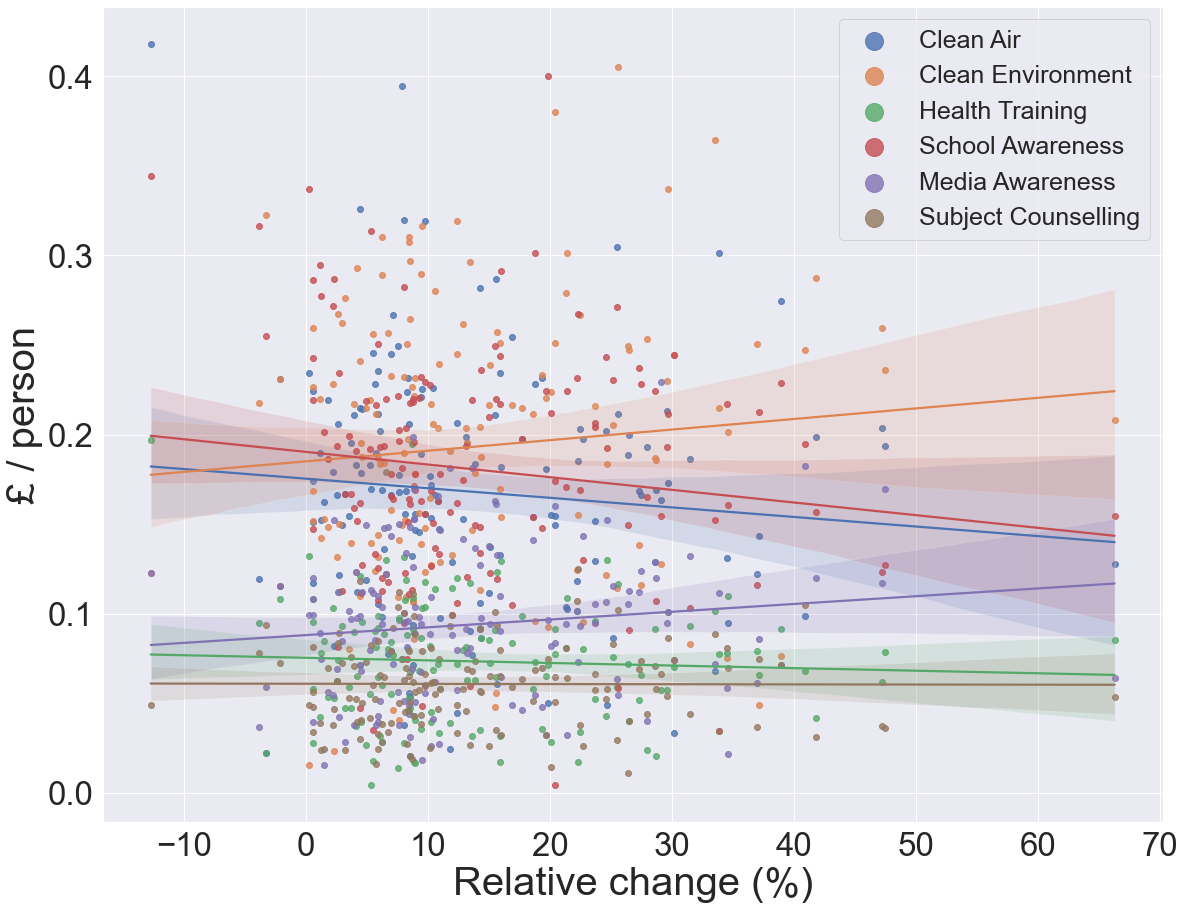

In [17]:
# Creates a scatter plot of all the independent variables in relation to Relative Change

plt.figure(figsize=(19,15))

sns.regplot(x=df["relative_change"], y=df["clean_air_per_person"], label="Clean Air") #blue
sns.regplot(x=df["relative_change"], y=df["clean_environ_per_person"], label="Clean Environment") #orange
sns.regplot(x=df["relative_change"], y=df["health_training_per_person"], label="Health Training") #green
sns.regplot(x=df["relative_change"], y=df["school_awareness_per_person"], label="School Awareness") #red
sns.regplot(x=df["relative_change"], y=df["media_awareness_per_person"], label="Media Awareness") #lilac
sns.regplot(x=df["relative_change"], y=df["sub_counselling_per_person"], label="Subject Counselling") #brown

plt.xlabel('Relative change (%)',fontsize=40)
plt.ylabel('£ / person',fontsize=40)
plt.legend(prop={'size':25}, markerscale=3)

## Multiple Regression Model

In [18]:
# Runs a Multiple Regression Model

df_new = df.loc[:, ["relative_change", 'clean_air_per_person', 'clean_environ_per_person',
       'health_training_per_person', 'school_awareness_per_person', 'media_awareness_per_person',
       'sub_counselling_per_person']]
model_mr1 = sm.formula.ols(f'relative_change ~ {" + ".join([col for col in df_new.columns if col != "relative_change"])}', df_new).fit()
model_mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        relative_change   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.059
Date:                Mon, 15 Nov 2021   Prob (F-statistic):              0.390
Time:                        16:11:20   Log-Likelihood:                -579.42
No. Observations:                 150   AIC:                             1173.
Df Residuals:                     143   BIC:                             1194.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      17.6858      8.845      2.000      0.047       0.203      35.169
clean_air_per_person          -14.6288     15.594     -0.938      0.350     -45.453      16.195
clean_environ_per_person        5.5413     15.802      0.351      0.726     -25.694      36.777
health_training_per_person    -14.2090     29.378     -0.484      0.629     -72.280      43.862
school_awareness_per_person   -22.1800     17.373     -1.277      0.204     -56.522      12.162
media_awareness_per_person     31.5844     24.629      1.282      0.202     -17.100      80.269
sub_counselling_per_person     -3.9344     38.437     -0.102      0.919     -79.912      72.043
==============================================================================
Omnibus:                       39.702   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.221
Skew:                           1.278   Prob(JB):                     1.53e-15
Kurtosis:                       5.093   Cond. No.                         42.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""